In [243]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


<h2 style="background-color:lightgreen;color:Blue">Time evolution (sanity check)</h2>
When you have a time dependent hamiltonian, the instantaneous eigenstates

In [244]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
from scipy.linalg import expm

sigmax = np.array([[0, 1],[1, 0]])
sigmay = np.array([[0, -1j],[1j, 0]])
sigmaz = np.array([[1, 0j],[0, -1]])

def H(w1, phi1, m, t):
    return np.sin(w1*t + phi1)*sigmax + np.sin(w1*t + phi1)*sigmay + (m - 2*np.cos(w1*t + phi1))*sigmaz
    
def eigv1(w1, phi1, m, t):  # not required for now
    d1 = np.sin(w1*t + phi1)
    d2 = np.sin(w1*t + phi1)
    d3 = (m - 2*np.cos(w1*t + phi1))
    d = np.sqrt(d1**2 + d2**2 + d3**2)
    return (1/(np.sqrt(2*d*(d+d3))))*np.array([d1 - 1j * d2, d + d3])
    
def eigv2(w1, phi1, m, t):  # not required for now
    d1 = np.sin(w1*t + phi1)
    d2 = np.sin(w1*t + phi1)
    d3 = (m - 2*np.cos(w1*t + phi1))
    d = np.sqrt(d1**2 + d2**2 + d3**2)
    return (1/(np.sqrt(2*d*(d+d3))))*np.array([d1 - 1j * d2, d - d3])

In [245]:
def U(w1, phi1, m, t, dt):
    return expm(-1j* H(w1, phi1, m, t)*dt)

def evolve(w1, phi1, m, dt, T):
    tvals = np.arange(0, T+dt, dt)
    u = np.identity(2)
    for i in tvals:
        u = np.dot(u, U(w1, phi1, m, i, dt))
    return u

In [246]:
band1 = []
band2 = []
tvals = np.arange(0,100,0.1)
w1 = np.pi/6
phi1 = 0
m = 1
dt = 0.1

for i in tvals:
    udag = np.transpose(np.conjugate( U(w1, phi1, m, i, dt) ))
    u = U(w1, phi1, m, i, dt)
    hu = np.dot(H(w1, phi1, m, i), u)
    udhu = np.transpose(np.conjugate(np.dot(udag, hu)))
    eigs = np.sort(la.eigvals(udhu))
    band1.append(eigs[0])
    band2.append(eigs[1])

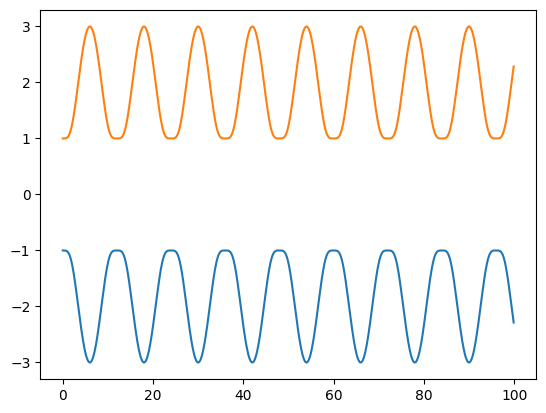

In [247]:
plt.plot(tvals, np.real(band1), label = 'band1')
plt.plot(tvals, np.real(band2), label = 'band2')
plt.show()

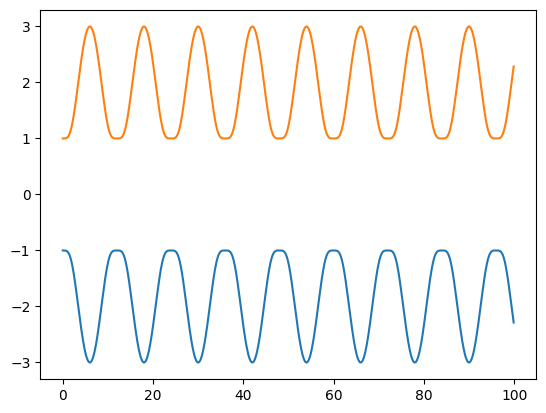

In [252]:
band1 = []
band2 = []
for i in tvals:
    a, b = np.sort(np.real(la.eigvals(H(w1, phi1, m, i))))
    band1.append(a)
    band2.append(b)
plt.plot(tvals, band1)
plt.plot(tvals, band2)
plt.show()

In [255]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


<h2 style="background-color:red;"">Two-tone qubit <br>Energy dispersion, E vs t (fixed inital phases)</h2>

In [256]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
from scipy.linalg import expm

sigmax = np.array([[0, 1],[1, 0]])
sigmay = np.array([[0, -1j],[1j, 0]])
sigmaz = np.array([[1, 0j],[0, -1]])

def H(w1, phi1, w2, phi2, m, t):
    return (np.sin(w1*t + phi1)*sigmax + np.sin(w2*t + phi2)*sigmay + (m - np.cos(w1*t + phi1) - np.cos(w2*t + phi2))*sigmaz)  #- np.matrix([[(w1+w2)*t, 0], [0, -(w1+w2)*t]])
    
def eigv1(w1, phi1, w2, phi2, m, t):
    d1 = np.sin(w1*t + phi1)
    d2 = np.sin(w1*t + phi1)
    d3 = (m - np.cos(w1*t + phi1) - np.cos(w2*t + phi2))
    d = np.sqrt(d1**2 + d2**2 + d3**2)
    return (1/(np.sqrt(2*d*(d+d3))))*np.array([d1 - 1j * d2, d + d3])

In [257]:
w1 = 0.1
g = (1+np.sqrt(5))/2
w2 = g*w1
tvals = np.arange(0,5,0.1)
m = 1
phi1 = np.pi/10
phi2 = 0

In [258]:
band1 = []
band2 = []
for i in tvals:
    a, b = np.sort(np.real(la.eigvals(H(w1, phi1, w2, phi2, m, i*(2*np.pi)/w1))))
    band1.append(a/w2)
    band2.append(b/w2)

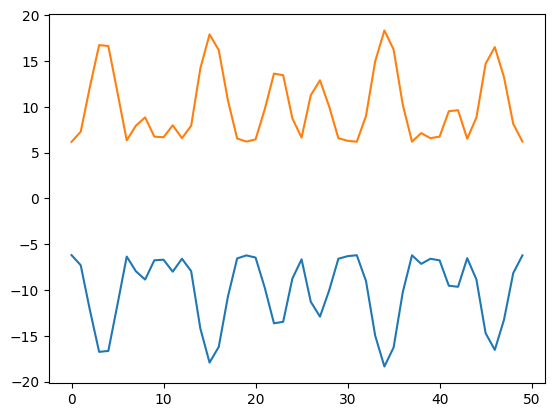

In [259]:
plt.plot(band1)
plt.plot(band2)

In [ ]:
del1 = []
del2 = []
for i in range(len(tvals)-1):
    del1.append((band1[i+1]-band1[i])/(tvals[1]-tvals[0]))
    del2.append((band2[i+1]-band2[i])/(tvals[1]-tvals[0]))

<h2></h2>